In [3]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Set constants
path = "./myData"
batch_size_val = 32
epochs_val = 20
image_dimensions = (32, 32, 3)
test_ratio = 0.2
validation_ratio = 0.2

# Load data and preprocess
images = []
labels = []
c=0
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        image = cv2.imread(img_path)
        image = cv2.resize(image, (image_dimensions[0], image_dimensions[1]))
        images.append(image)
        labels.append(int(folder))
    print(f"Class : ",c)
    c+=1

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=test_ratio, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_ratio, random_state=42)

# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
y_train = to_categorical(y_train, num_classes)
y_validation = to_categorical(y_validation, num_classes)
y_test = to_categorical(y_test, num_classes)

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size_val)

# Define model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_dimensions[0], image_dimensions[1], image_dimensions[2])),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=len(X_train) // batch_size_val, epochs=epochs_val, validation_data=(X_validation, y_validation))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


Class :  0
Class :  1
Class :  2
Class :  3
Class :  4
Class :  5
Class :  6
Class :  7
Class :  8
Class :  9
Class :  10
Class :  11
Class :  12
Class :  13
Class :  14
Class :  15
Class :  16
Class :  17
Class :  18
Class :  19
Class :  20
Class :  21
Class :  22
Class :  23
Class :  24
Class :  25
Class :  26
Class :  27
Class :  28
Class :  29
Class :  30
Class :  31
Class :  32
Class :  33
Class :  34
Class :  35
Class :  36
Class :  37
Class :  38
Class :  39
Class :  40
Class :  41
Class :  42



Epoch 1/20


695/695 [==============================] - 31s 39ms/step - loss: 2.2790 - accuracy: 0.3326 - val_loss: 46.9184 - val_accuracy: 0.5853
Epoch 2/20
695/695 [==============================] - 27s 39ms/step - loss: 1.0203 - accuracy: 0.6628 - val_loss: 23.8557 - val_accuracy: 0.8231
Epoch 3/20
695/695 [==============================] - 28s 40ms/step - loss: 0.6398 - accuracy: 0.7938 - val_loss: 11.5227 - val_accuracy: 0.9111
Epoch 4/20
695/695 [==============================] - 

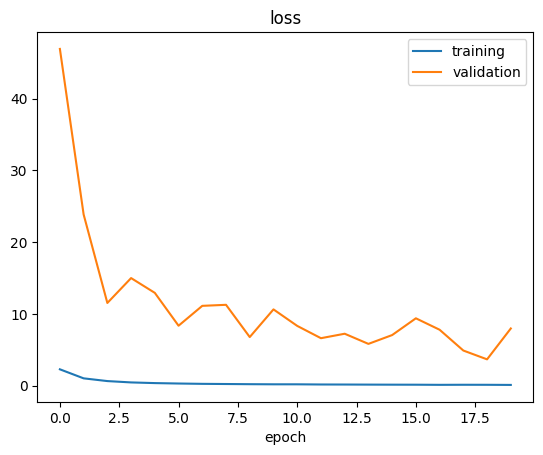

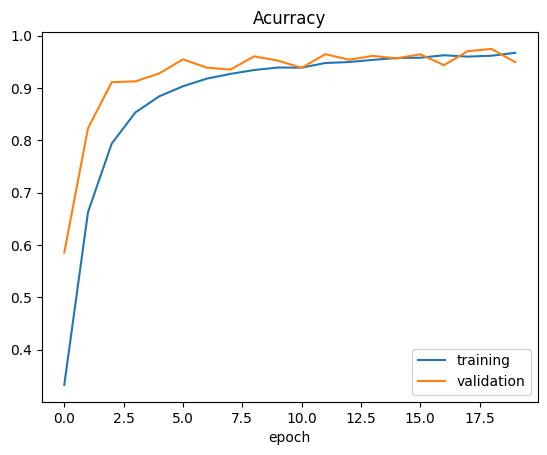

In [5]:
import matplotlib.pyplot as plt

############################### PLOT
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

In [7]:
import pickle

with open("model_trained.p","wb") as f:
    pickle.dump(model,f)
    
    